   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

 Missing values :
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  -

<ipython-input-13-39f914672433>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


<Figure size 1200x1000 with 0 Axes>

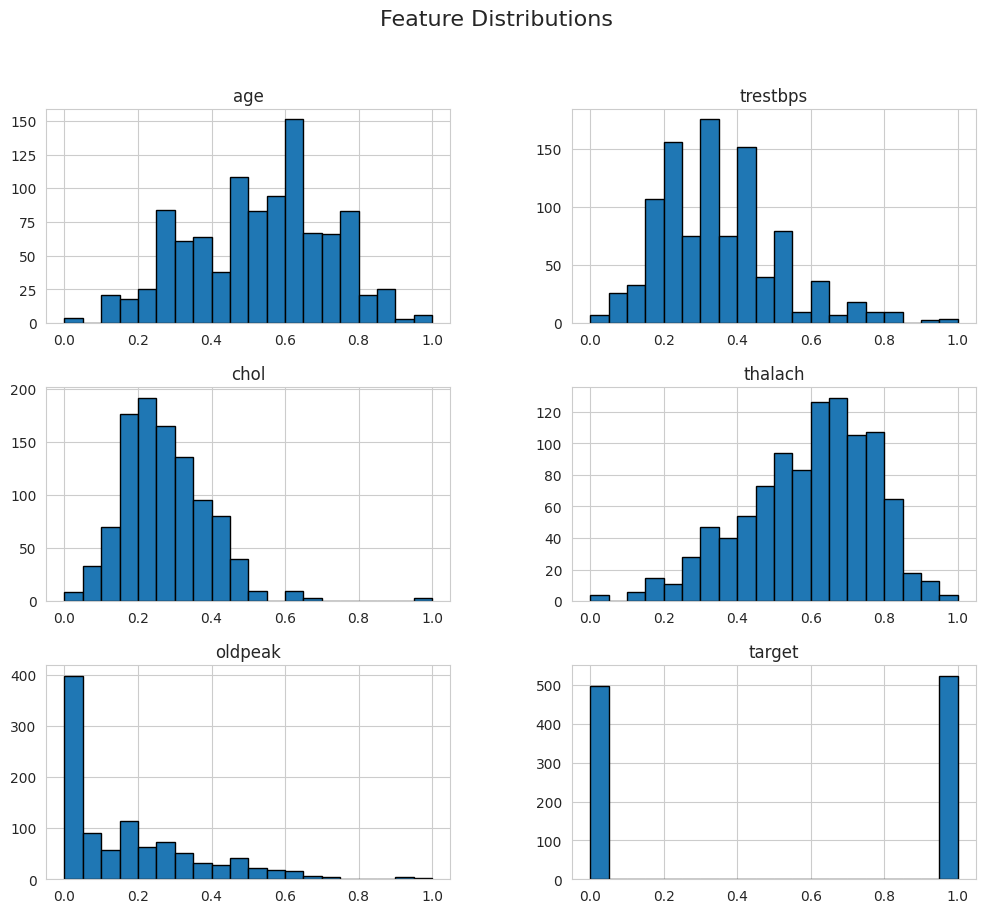

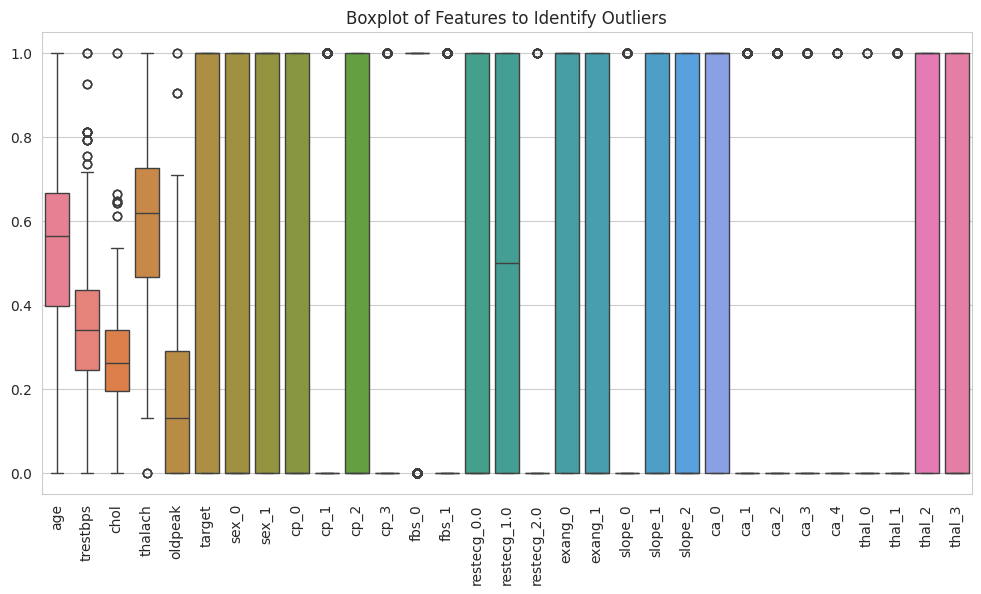

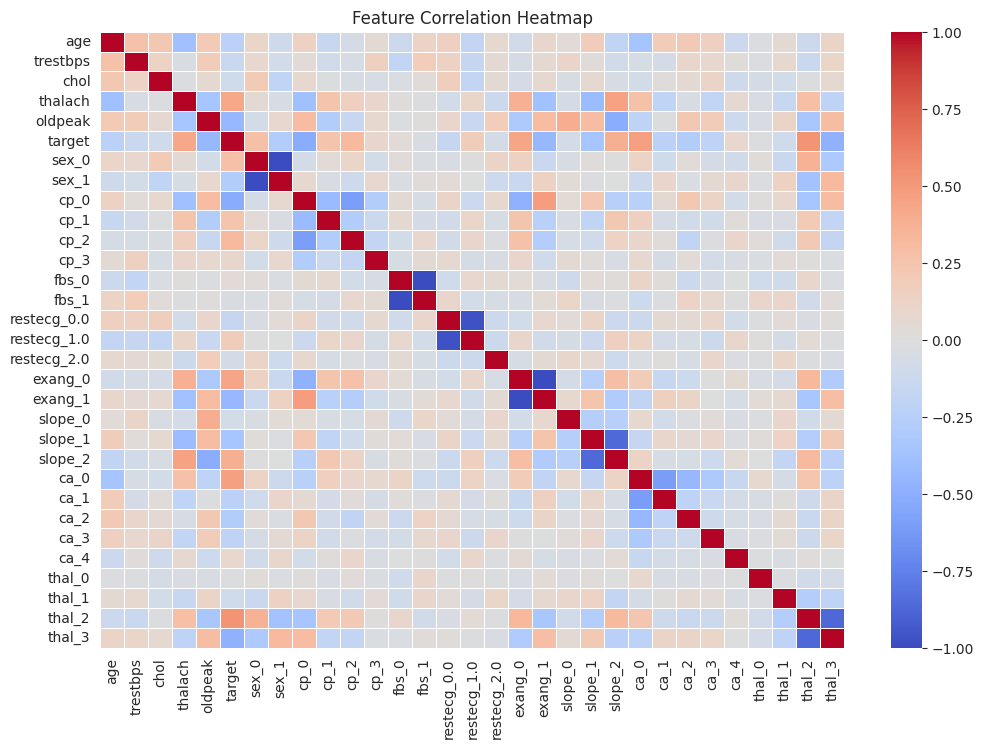

<ipython-input-13-39f914672433>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")


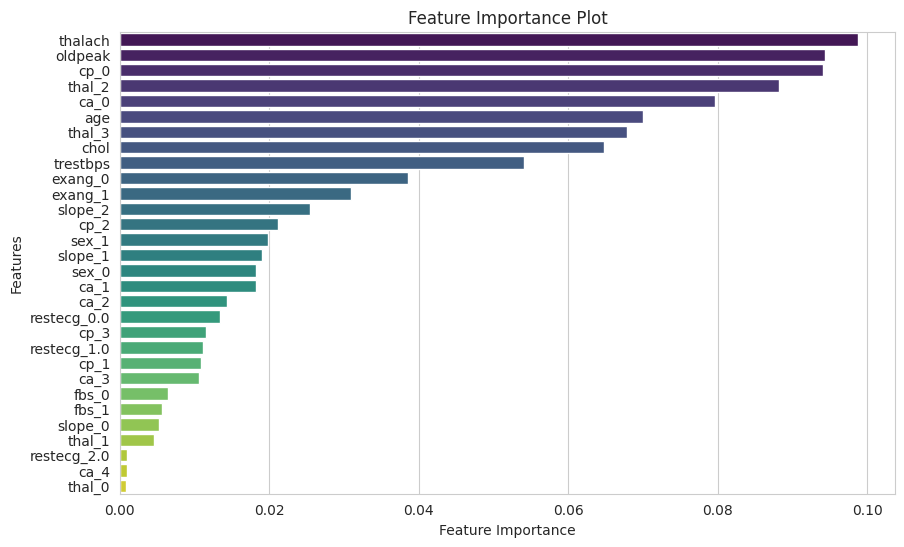

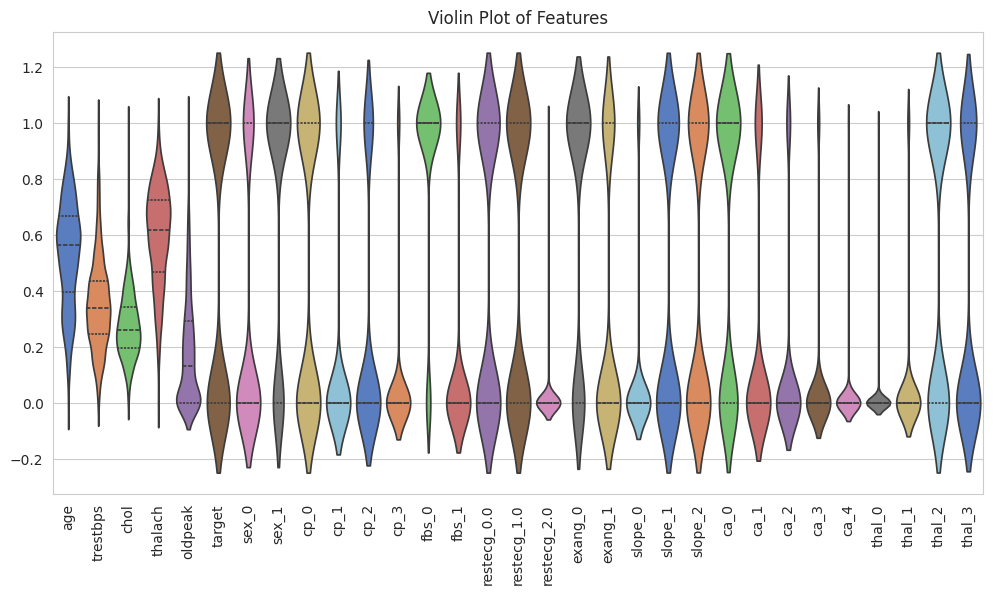

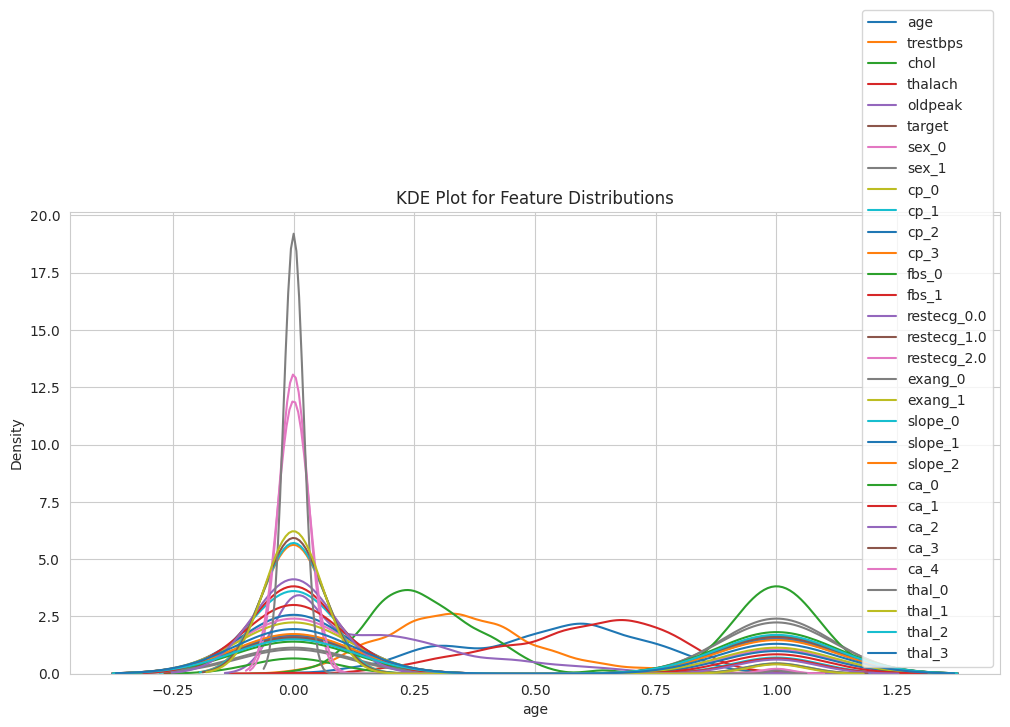

cleaned_data.csv  heart.csv  Heart-Disease-Detection  sample_data


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("heart.csv")

print(df.head())
print("\n Missing values :\n" , df.isnull().sum())
print("Data info:\n", df.info())

#there is 3 rows that have missing values
#remove rows
df_cleaned = df.dropna()
print("data size after clean: ", df_cleaned.shape)





# Separate numerical and categorical columns
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Scale numerical features using MinMaxScaler (values between 0 and 1)
scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Display the transformed dataset
print(df_encoded.head())


# Compute correlation matrix
correlation_matrix = df_encoded.corr()


# Print correlation values with target
print("\nFeature Correlation with Target:\n")
print(correlation_matrix["target"].sort_values(ascending=False))

#Save the cleaned dataset (with all features)
df_encoded.to_csv("cleaned_data.csv", index=False)

print("Cleaned dataset saved as 'cleaned_data.csv'.")
#------------------------------------------------------------------------------------------------------------------------------

#VISULATION


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Ensure seaborn has a nice theme
sns.set_style("whitegrid")

# 📌 1️⃣ Histograms for Feature Distributions
plt.figure(figsize=(12, 10))
df_encoded.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 📌 2️⃣ Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=90)
plt.title("Boxplot of Features to Identify Outliers")
plt.show()

# 📌 3️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 📌 4️⃣ Feature Importance Plot (Using RandomForest)
# ✅ FIXED: Define X and y before fitting the model
X = df_encoded.drop(columns=["target"])  # Drop target column
y = df_encoded["target"]  # Target variable

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

# 📌 5️⃣ Violin Plot (Alternative to Boxplot)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_encoded, inner="quartile", palette="muted")
plt.xticks(rotation=90)
plt.title("Violin Plot of Features")
plt.show()

# 📌 6️⃣ KDE Plot (Alternative to Histogram)
plt.figure(figsize=(12, 6))
for col in df_encoded.columns:
    sns.kdeplot(df_encoded[col], label=col)
plt.legend()
plt.title("KDE Plot for Feature Distributions")
plt.show()

!ls /content/


